In [68]:
import numpy as np


import matplotlib.pyplot as plt


import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42



In [78]:
RESULTS_DIR = "../paper_experiments/falkon_experiments/results"

methods = [
    ("STP",  "other", "stp_trace.log"),
    ("FD Coordinates [l = 1]",  "fd", "co_1_trace.log"),
    ("FD Coordinates [l = d]",  "fd", "co_9_trace.log"),
    ("FD Gaussian [l = 1]",  "fd", "g_1_trace.log"),
    ("FD Gaussian [l = d]",  "fd", "g_9_trace.log"),
    ("FD Spherical [l = 1]",  "fd", "sp_1_trace.log"),
    ("FD Spherical [l = d]",  "fd", "sp_9_trace.log"),
    ("ProbDS Spherical",  "ds", "probds_sp_2_trace.log"),
    ("ProbDS Orthogonal",  "ds", "probds_ortho_2_trace.log"),
    ("ProbDS-RD Spherical",  "ds", "probds_sketch_sp_2_trace.log"),
    ("ProbDS-RD Orthogonal",  "ds", "probds_sketch_ortho_2_trace.log"),
    ("SSZD [l = d/2]",  "all", "sszd_4_orth_trace.log"),
    ("SSZD [l = d]",  "all", "sszd_9_orth_trace.log"),
]



# Read Results

In [79]:

def read_result(directory):
    results = {}
    for (name, category, fname) in methods:
        if category not in results:
            results[category] = {}
        if name not in results[category]:
            results[category][name] = {
                'mu_tr' : [],
                'std_tr' : [],
                'mu_vl' : [],
                'std_vl' : [],                
            }
        with open(f"{directory}/{fname}", 'r') as f:
            lines = f.readlines()
            for line in lines:
                splitted = line.split(",")
                results[category][name]['mu_tr'].append(float(splitted[0]))
                results[category][name]['std_tr'].append(float(splitted[1]))
                results[category][name]['mu_vl'].append(float(splitted[2]))
                results[category][name]['std_vl'].append(float(splitted[3]))
    return results


colors = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:olive',
    'tab:purple',
    'dodgerblue',
    'slategray',
    'crimson',
    'navy',
    'saddlebrown',
    'goldenrod',
    'darkslategray',
    'black',
    'dimgray'

]


In [94]:
def get_label(name, results):
    for k in results.keys():
        if name in results[k]:
            return k
    raise Exception("Unknown method!")

def plot_result(dataset_name, category, results, plot_all = False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    for (i, (name, _, _)) in enumerate(methods):
        if plot_all or name in results[category] or name in results['all']:
            # TRAINING ERROR
#            if plot_all:
            label = get_label(name, results)
 #           label = category if name in results[category] else 'all'
            mu_tr, std_tr = np.array(results[label][name]['mu_tr']), np.array(results[label][name]['std_tr'])
            mu_vl, std_vl = np.array(results[label][name]['mu_vl']), np.array(results[label][name]['std_vl'])
            ax1.plot(range(len(mu_tr)), mu_tr, '-', lw=4, color=colors[i], label=name)
            ax1.fill_between(range(len(mu_tr)), mu_tr - std_tr, mu_tr + std_tr, color=colors[i], alpha=0.1)
            ax2.plot(range(len(mu_vl)), mu_vl, '-', lw=4, label=name, color=colors[i])
            ax2.fill_between(range(len(mu_vl)), mu_vl - std_vl, mu_vl + std_vl, alpha=0.1, color=colors[i])
    ax1.legend()
    fig.suptitle(f"{dataset_name}", fontsize=20)
    ax1.set_title("Training Error", fontsize=18)
    ax2.set_title("Validation Error", fontsize=18)
    ax1.set_xlabel("function evaluations", fontsize=16)
    ax2.set_xlabel("function evaluations", fontsize=16)
    ax1.set_yscale("log")
    ax2.set_yscale("log")
    fig.tight_layout()
    ax1.grid()
    ax2.grid()
    out_file = f"{dataset_name.replace(" ", "_")}_{category}.pdf"
    if plot_all:
        out_file = f"{dataset_name.replace(" ", "_")}_all.pdf"
    fig.savefig(out_file, bbox_inches='tight')


# Plot results

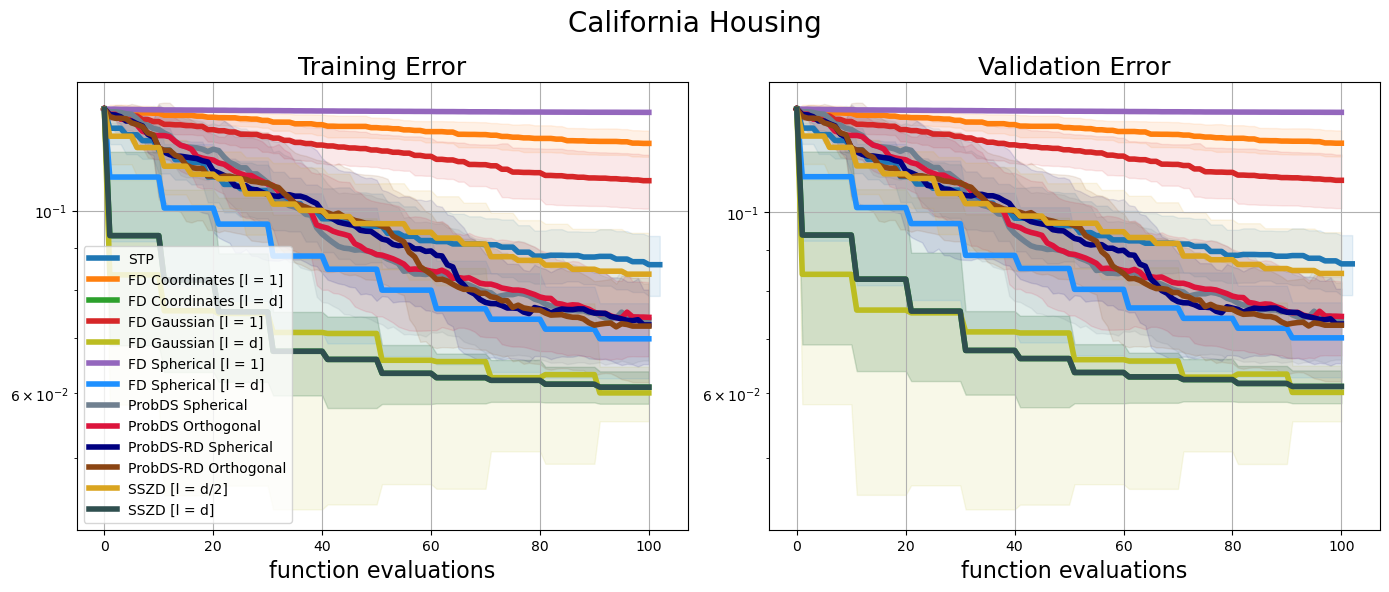

In [99]:
datasets = [
    #('CASP', 'casp'),
    #('HTRU2', 'htru2'),
    ('California Housing', 'california_housing')
]


category = 'other'

for (name, dataset_directory) in datasets:
    results = read_result(f"{RESULTS_DIR}/{dataset_directory}")
#    for category in ['fd', 'ds', 'other']:
#        plot_result(name, category, results)
    plot_result(name, category, results, plot_all=True)

